In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# LEITURA E ADEQUAMENTO DOS DADOS

In [2]:
df_full = pd.read_csv('banco_de_dados.csv')

In [3]:

# Considerando a variável rv1 como a TARGET do dataset


df_full = df_full.round()
# Definindo a variavel date como Index do Dataset. 
# Essa operação transforma os dados em séries possibilitando a análise como Series Temporais.

df_full.head(5)



,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,20.0,48.0,19.0,45.0,20.0,45.0,19.0,...,734.0,92.0,7.0,63.0,5.0,13.0,13.0,61200,Weekday,Monday
1,2016-01-11 17:00:00,60,30,20.0,48.0,19.0,45.0,20.0,45.0,19.0,...,734.0,92.0,7.0,63.0,5.0,13.0,13.0,61200,Weekday,Monday
2,2016-01-11 17:10:00,60,30,20.0,47.0,19.0,45.0,20.0,45.0,19.0,...,734.0,92.0,7.0,59.0,5.0,19.0,19.0,61800,Weekday,Monday
3,2016-01-11 17:10:00,60,30,20.0,47.0,19.0,45.0,20.0,45.0,19.0,...,734.0,92.0,7.0,59.0,5.0,19.0,19.0,61800,Weekday,Monday
4,2016-01-11 17:20:00,50,30,20.0,46.0,19.0,45.0,20.0,45.0,19.0,...,734.0,92.0,6.0,55.0,5.0,29.0,29.0,62400,Weekday,Monday


In [4]:
df_full=df_full.drop(['Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv2', 'NSM', 'WeekStatus', 'Day_of_week'],axis=1)

In [75]:
df_full.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T7,RH_7,T8,RH_8,T9,RH_9,T_out,rv1,temperatura_media,umidade_media
count,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000,...,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000
mean,98.000000,3.802398,21.695930,40.274987,20.346056,40.422192,22.249248,39.256308,20.861848,39.023814,...,20.264212,35.394629,22.024219,42.924236,19.485121,41.549367,7.412329,25.081169,19.377673,42.718966
std,102.809914,7.940258,1.635234,3.993257,2.213412,4.082797,2.027808,3.266530,2.066201,4.353123,...,2.137448,5.124173,1.977218,5.250247,2.044389,4.155565,5.333657,14.485147,2.167508,5.967517
min,10.000000,0.000000,17.000000,27.000000,16.000000,21.000000,17.000000,29.000000,15.000000,28.000000,...,15.000000,23.000000,16.000000,30.000000,15.000000,29.000000,-5.000000,0.000000,15.000000,28.000000
25%,50.000000,0.000000,21.000000,37.000000,19.000000,38.000000,21.000000,37.000000,20.000000,36.000000,...,19.000000,32.000000,21.000000,39.000000,18.000000,38.000000,4.000000,13.000000,18.000000,38.000000
50%,60.000000,0.000000,22.000000,40.000000,20.000000,40.000000,22.000000,39.000000,21.000000,38.000000,...,20.000000,35.000000,22.000000,42.000000,19.000000,41.000000,7.000000,25.000000,19.000000,42.000000
75%,100.000000,0.000000,23.000000,43.000000,22.000000,43.000000,23.000000,42.000000,22.000000,42.000000,...,22.000000,39.000000,23.000000,47.000000,21.000000,44.000000,10.000000,38.000000,21.000000,47.000000
max,1080.000000,50.000000,26.000000,63.000000,30.000000,56.000000,29.000000,50.000000,26.000000,51.000000,...,26.000000,51.000000,27.000000,59.000000,24.000000,53.000000,26.000000,50.000000,26.000000,58.000000


In [5]:
df_full.drop(['date'],axis=1,inplace=True)
display(df_full)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,rv1
0,60,30,20.0,48.0,19.0,45.0,20.0,45.0,19.0,46.0,...,7.0,84.0,17.0,42.0,18.0,49.0,17.0,46.0,7.0,13.0
1,60,30,20.0,48.0,19.0,45.0,20.0,45.0,19.0,46.0,...,7.0,84.0,17.0,42.0,18.0,49.0,17.0,46.0,7.0,13.0
2,60,30,20.0,47.0,19.0,45.0,20.0,45.0,19.0,46.0,...,7.0,84.0,17.0,42.0,18.0,49.0,17.0,46.0,6.0,19.0
3,60,30,20.0,47.0,19.0,45.0,20.0,45.0,19.0,46.0,...,7.0,84.0,17.0,42.0,18.0,49.0,17.0,46.0,6.0,19.0
4,50,30,20.0,46.0,19.0,45.0,20.0,45.0,19.0,46.0,...,7.0,83.0,17.0,41.0,18.0,49.0,17.0,46.0,6.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29601,90,0,26.0,46.0,26.0,42.0,27.0,41.0,25.0,46.0,...,24.0,1.0,25.0,44.0,25.0,50.0,23.0,47.0,23.0,49.0
29602,420,10,26.0,47.0,25.0,43.0,27.0,41.0,25.0,46.0,...,22.0,1.0,24.0,44.0,25.0,50.0,23.0,47.0,22.0,6.0
29603,420,10,26.0,47.0,25.0,43.0,27.0,41.0,25.0,46.0,...,22.0,1.0,24.0,44.0,25.0,50.0,23.0,47.0,22.0,6.0
29604,430,10,26.0,47.0,25.0,43.0,27.0,41.0,25.0,46.0,...,21.0,1.0,24.0,44.0,25.0,50.0,23.0,47.0,22.0,34.0


In [6]:
df_full = df_full.drop([29605])

In [7]:
df_full.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'rv1'],
      dtype='object')

In [ ]:
#reduzindo o data set para medições diaria
df_full_Dia = df_full.resample('D').mean()

In [9]:
#adicionando colunas de temperatura e umidade média
df_full['temperatura_media'] = df_full[['T1', 'T2','T3','T4','T5','T6','T7','T8','T9',]].mean(axis=1)
df_full['umidade_media'] = df_full [[ 'RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9',]].mean(axis=1)

In [10]:
df_full_2 = df_full[['Appliances', 'lights','temperatura_media','T_out','rv1']]

In [52]:

data = np.array(df_full_2)
data = tf.keras.utils.normalize(data,axis=1)


In [53]:
df_full_2.round()

,Appliances,lights,temperatura_media,T_out,rv1
0,60,30,17.111111,7.0,13.0
1,60,30,17.111111,7.0,13.0
2,60,30,17.111111,6.0,19.0
3,60,30,17.111111,6.0,19.0
4,50,30,17.111111,6.0,29.0
...,...,...,...,...,...
29600,90,0,24.888889,23.0,49.0
29601,90,0,24.888889,23.0,49.0
29602,420,10,24.444444,22.0,6.0
29603,420,10,24.444444,22.0,6.0


In [54]:
data

array([[0.84761404, 0.42380702, 0.24172697, 0.09888831, 0.18364971],
       [0.84761404, 0.42380702, 0.24172697, 0.09888831, 0.18364971],
       [0.83286834, 0.41643417, 0.23752171, 0.08328683, 0.26374164],
       ...,
       [0.99656671, 0.02372778, 0.05800124, 0.05220111, 0.01423667],
       [0.99656671, 0.02372778, 0.05800124, 0.05220111, 0.01423667],
       [0.99375262, 0.02311053, 0.05623561, 0.05084316, 0.07857579]])

In [55]:
X_train = data[0:20000,0:4]
y_train = data[0:20000,4:5]

x_test = data[20000:29605,0:4]
y_test = data[20000:29605,4:5]

# CRIAÇÃO E TREINAMENTO DA REDE

In [57]:
# Criando Rede
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(4))
model.add(tf.keras.layers.Dense(20,activation=tf.nn.softplus))
model.add(tf.keras.layers.Dense(20,activation=tf.nn.softplus))
model.add(tf.keras.layers.Dense(1,activation=tf.nn.softplus))

# Parâmetros de treinamento
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics = ['mean_squared_error'])

# Treinando 
model.fit(X_train,y_train,epochs=500)

Epoch 1/500
625/625 [==============================] - 1s 896us/step - loss: 0.0453 - mean_squared_error: 0.0453
Epoch 2/500
625/625 [==============================] - 1s 874us/step - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 3/500
625/625 [==============================] - 1s 869us/step - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 4/500
625/625 [==============================] - 1s 870us/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 5/500
625/625 [==============================] - 1s 880us/step - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 6/500
625/625 [==============================] - 1s 875us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 7/500
625/625 [==============================] - 1s 866us/step - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 8/500
625/625 [==============================] - 1s 868us/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 9/500
625/625 [==============================] - 1s 922us/step - loss: 0.0133 - mean_squar

# VALIDAÇÃO

In [77]:
dados_normalizados = np.array(data)
minimos_originais = 0
maximos_originais = 1080

# Agora você deseja desfazer a normalização para plotar um gráfico
dados_original = dados_normalizados * (maximos_originais - minimos_originais) + minimos_originais

301/301 [==============================] - 0s 739us/step


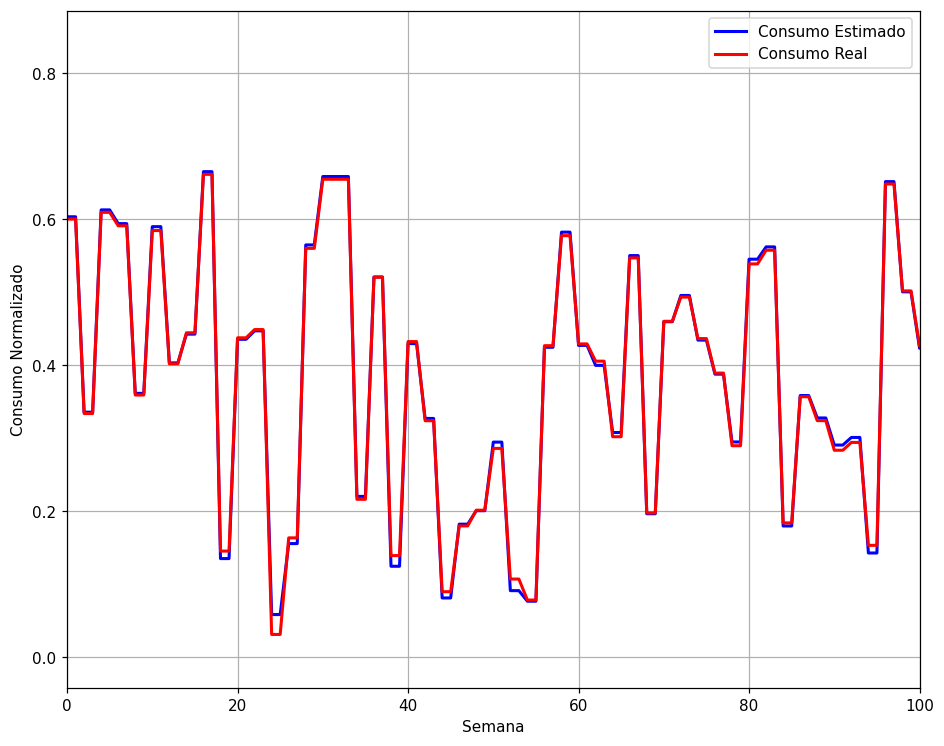

In [78]:
val_loss, val_mse = model.evaluate(x_test,y_test)
y_pred = model.predict(x_test)

plt.figure(figsize=(10,8),dpi=110)
plt.plot(y_pred[:,0],lw=2,color='Blue')
plt.plot(y_test[:,0],lw=2,color='Red')
plt.grid(True)
plt.xlim([0,100])
plt.xlabel('Semana')
plt.ylabel('Consumo Normalizado')
plt.legend(['Consumo Estimado','Consumo Real']) 

# DEMAIS VALIDAÇÕES

C:\Users\andre\AppData\Local\Temp\ipykernel_22984\1784186140.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred[:,0]-y_test[:,0])


<Axes: ylabel='Density'>

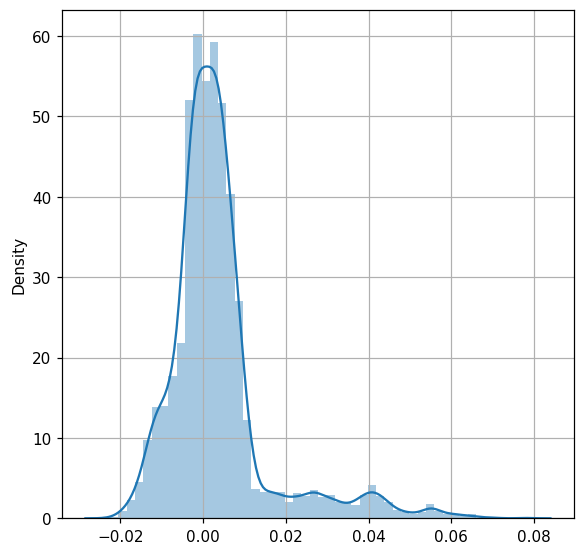

In [63]:
plt.figure(figsize=(6,6),dpi=110)
plt.grid(True)
#plt.plot(y_pred[:,0]-y_test[:,0])
#plt.xlim([0,91])
sns.distplot(y_pred[:,0]-y_test[:,0])